In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2
import mxnet as mx
import dataiter
import model
import util
import metric
import time
import dataset
import glob
import matplotlib 
import sys
from config import cfg,batchsize
import re
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

# Prediction example
     Multiprocessing will lead ipython notebook kernel crash，don't use multi_thread=True in ipython notebook !!

In [5]:
# config
data_type = 'flow'

ctx = mx.gpu(3)
batch_shape = (1,3,384,768)
net = model.flow_and_stereo_net(data_type)
label_shapes = util.estimate_label_size(net, batch_shape)

#load paremeter and prepare data
executor = util.load_model(name='/data/check_point/check_point/' + data_type,epoch = 22,net=net,batch_shape = batch_shape,ctx = ctx,network_type='null')

iterator = dataiter.Dataiter(dataset= dataset.SythesisData(data_type=data_type),
                             batch_size = batch_shape,
                             is_train = True,
                             label_shapes = label_shapes,
                             augment_ratio = 0.0,
                             multi_thread=False,
                             n_thread=10, be_shuffle=True, sub_mean=True)

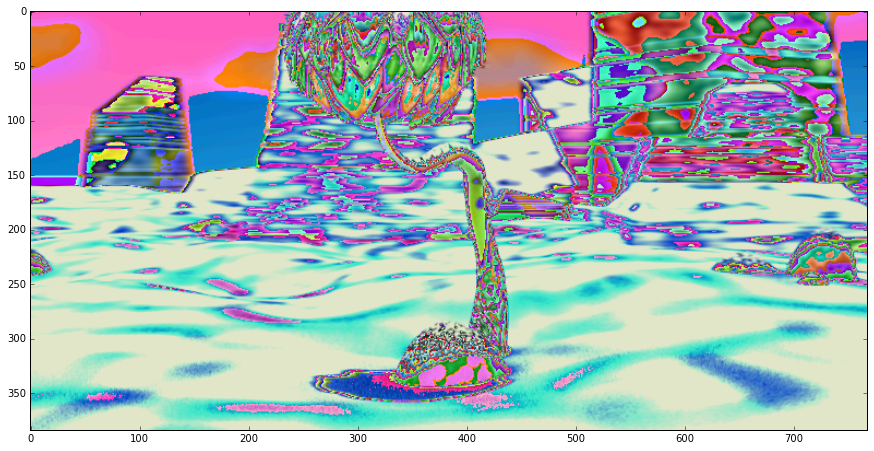

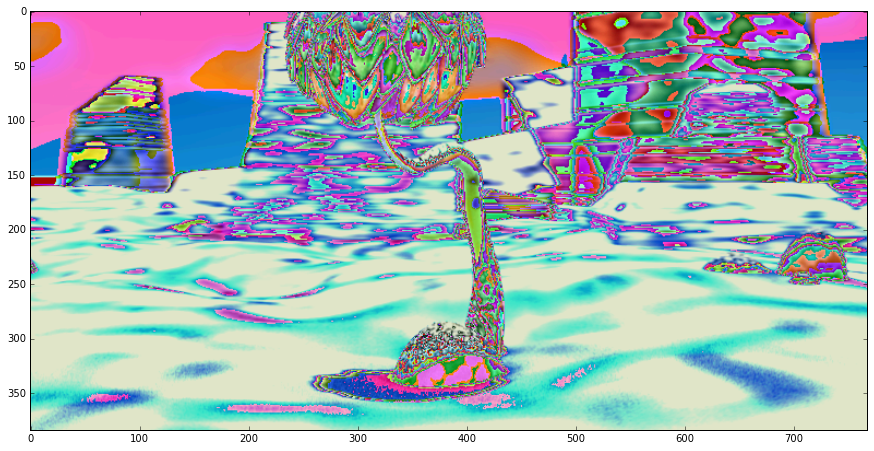

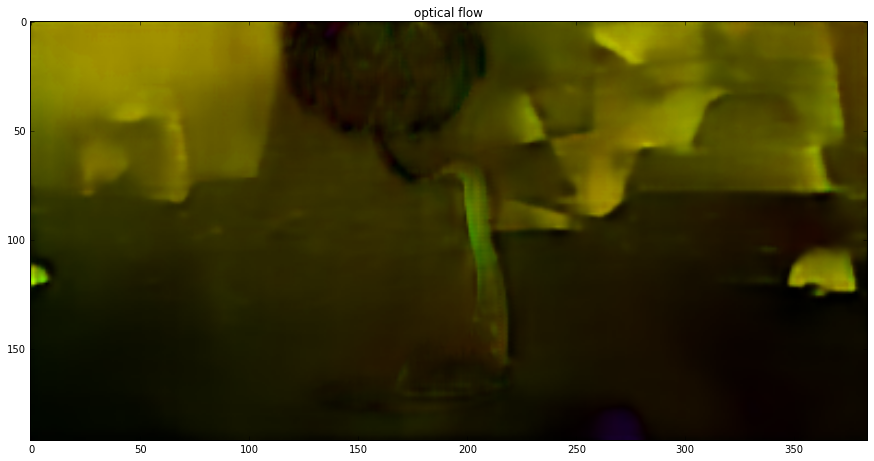

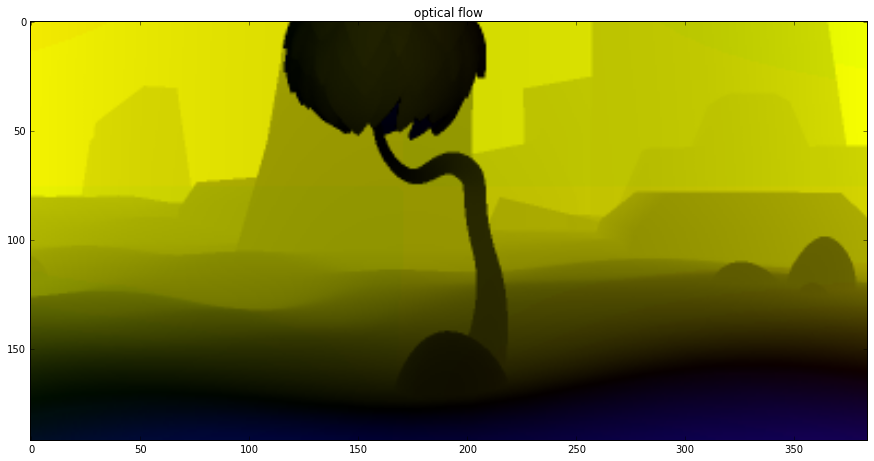

In [15]:
# init metric
d1all  = metric.D1all()
d1all.reset()

for dbatch in iterator:
    executor.arg_dict['img1'][:] = dbatch.data[0]
    executor.arg_dict['img2'][:] = dbatch.data[1]
    
    for j in range(len(label_shapes)):
        executor.arg_dict[data_type + '_downsample%d' %(j+1)][:] = dbatch.label[j]

    executor.forward(is_train=True)
    break

plt.imshow(dbatch.data[0][0].swapaxes(0,1).swapaxes(1,2))
plt.figure()
plt.imshow(dbatch.data[1][0].swapaxes(0,1).swapaxes(1,2))

if data_type == 'stereo':
    plt.figure()
    plt.imshow(executor.outputs[0].asnumpy()[0][0])
    plt.figure()
    plt.imshow(dbatch.label[0][0][0])
elif data_type == 'flow':
    util.flow2color(executor.outputs[0].asnumpy()[0].swapaxes(0,1).swapaxes(1,2))
    util.flow2color(dbatch.label[0][0].swapaxes(0,1).swapaxes(1,2))

In [16]:
cv2.COLOR_HSV2BGR

54